# Get started with predicting house prices

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
# our data is compressed. so use pandas to read the uncompressed csv file
import lzma

with lzma.open('./home_data.csv.xz') as zfile:
    sales = pd.read_csv(zfile)

In [3]:
# observe data
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# observe data
sales.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


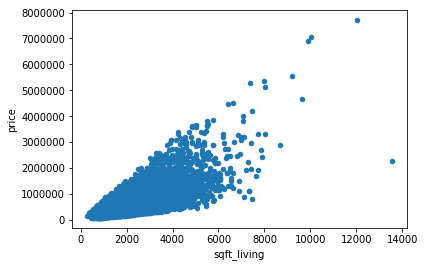

In [5]:
# plot sqft_living against price in a scatter graph
%matplotlib inline
sales.plot(kind='scatter', x='sqft_living', y='price')

# Create a simple regression model of sqft_living to price

Split data into training and testing.
We use numpy here to randomly split original data into train and test datasets

In [6]:
msk = np.random.rand(len(sales)) < 0.8
train = sales[msk]
test = sales[~msk]

## Build the regression model using only sqft_living as a feature

In [7]:
# first we need to extract and reshape sqft_living and price as values to feed into sklearn
train_x = train['sqft_living'].values
train_y = train['price'].values
train_x = train_x.reshape(len(train_x), 1)
train_y = train_y.reshape(len(train_y), 1)
test_x = test['sqft_living'].values
test_y = test['price'].values
test_x = test_x.reshape(len(test_x), 1)
test_y = test_y.reshape(len(test_y), 1)
# now feed into regression model
regr = linear_model.LinearRegression()
model = regr.fit(train_x, train_y)

# Evaluate the simple model

In [8]:
print(test['price'].mean())

544011.1586303285


In [9]:
print('rmse: {}'.format(np.sqrt(np.mean((regr.predict(test_x) - test_y) ** 2))))

rmse: 262887.8975681158


## Let's show what out predictions look like

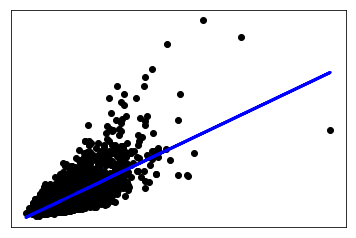

In [10]:
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, regr.predict(test_x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# Explore other features in the data

In [11]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

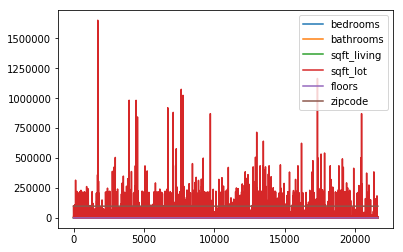

In [12]:
sales[my_features].plot()

## Build a regression model with more features

In [13]:
# first we need to extract and reshape sqft_living and price as values to feed into sklearn
train_x2 = train[my_features].values
test_x2 = test[my_features].values
regr2 = linear_model.LinearRegression()
model2 = regr2.fit(train_x2, train_y)

In [14]:
print('rmse: {}'.format(np.sqrt(np.mean((regr2.predict(test_x2) - test_y) ** 2))))

rmse: 259374.88581150593


The RMSE goes down from with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle.

In [15]:
house1 = sales[sales['id']==5309101200]

In [16]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [17]:
print(house1['price'])

1054    620000
Name: price, dtype: int64


In [18]:
house1_sqft = house1['sqft_living'].values
house1_sqft = house1_sqft.reshape(len(house1_sqft), 1)
print(regr.predict(house1_sqft))

[[629206.34042041]]


In [19]:
house1_features = house1[my_features].values
print(regr2.predict(house1_features))

[[629178.73399211]]


## Prediction for a second, fancier house
We will now examine the predictions for a fancier house.

In [20]:
house2 = sales[sales['id']==1925069082]

In [21]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [22]:
print(house2['price'])

1361    2200000
Name: price, dtype: int64


In [23]:
house2_sqft = house2['sqft_living'].values
house2_sqft = house2_sqft.reshape(len(house2_sqft), 1)
print(regr.predict(house2_sqft))

[[1258464.75075584]]


In [24]:
house2_features = house2[my_features].values
print(regr2.predict(house2_features))

[[1262706.32612269]]


# Last house, super fancy
Our last house is a very large one owned by a famous Seattleite.

In [25]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}
bg_df = pd.DataFrame(bill_gates)

In [26]:
bg_df_vals = bg_df[my_features]
print(regr2.predict(bg_df_vals))

[[15804665.87242977]]


The model predicts a price of over $15M for this house! But we expect the house to cost much more. (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)